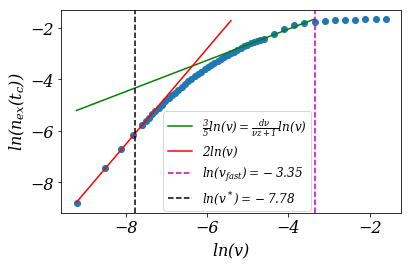

In [1]:
####### Code by Matt Richards ###################################
####
#### This code takes data from a time dynamics simulation 
#### of a BEC-impurity double well model and applies linear regression
#### to the logarithm of excitation probability
################################################################

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
from scipy import stats
import matplotlib

### Take data from directory ###

dir = "./"
file = "defects_TUCAN_N100.txt"
#file1= "defects_N=4_vslow.txt"
fn=np.loadtxt(dir+file, dtype=np.double)
#fn1=np.loadtxt(dir+file1, dtype=np.double)
nowcol = 'r'
nowpt = 'o'

############################################
### Modify font and text for readability ###
############################################

font = {'family' : 'serif',
        'style'  : 'italic',
        'weight' : 'normal',
        'size'   : 16}

matplotlib.rc('font', **font)
plt.rcParams['mathtext.fontset'] = 'dejavuserif'

### Initialize and specify data points used within the data set ##

k=[0 for i in range(56)] #This is my fancy way of reading in the data for the midpoint between each time i.e. Wcrit=1. 
q=[0 for i in range(20)]
#The reason why is because we need to rescale the energy with the quench speed for various times.
k[0]=0
q[0]=0

for i in range(1,56):
    k[i]=41*i
    
### CHoosing specific ranges of data points to plot over ###
    
y=[fn[k[i-1]+20,3] for i in range(1,56)]
x=[-fn[k[i-1]+20,4] for i in range(1,56)]
y1=[fn[k[i-1]+20,3] for i in range(35,49)]#orginally 30 to 44
x1=[-fn[k[i-1]+20,4] for i in range(35,49)]#originally 30 to 44
y3=[fn[k[i-1]+20,3] for i in range(1,10)]#originally 1 to 5
x3=[-fn[k[i-1]+20,4] for i in range(1,10)]#originally 1 to 5
y4=[fn[k[i-1]+20,3] for i in range(1,49)]#originally 1 to 5
x4=[-fn[k[i-1]+20,4] for i in range(1,49)]#originally 1 to 5
y5=[fn[k[i-1]+20,3] for i in range(1,34)]#originally 1 to 5
x5=[-fn[k[i-1]+20,4] for i in range(1,34)]#originally 1 to 5

### Applying linear regression to some of the data points ###

fit1 = np.polyfit(x1,y1,1)
fit_fn1 = np.poly1d(fit1) 
fit3 = np.polyfit(x3,y3,1)
fit_fn3 = np.poly1d(fit3) 

slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
slope1, intercept1, r_value1, p_value1, std_err1 = stats.linregress(x1, y1)
slope3, intercept3, r_value3, p_value3, std_err3 = stats.linregress(x3, y3)
# fit_fn is now a function which takes in x and returns an estimate for y

### P

plt.plot(x,y,marker='o',ls='')
plt.plot(x4, fit_fn1(x4), '--k',ls='-',color='g',label=r'$\frac{3}{5}ln(v)=\frac{d\nu}{\nu z+1}ln(v)$')
plt.plot(x5, fit_fn3(x5), '--',ls='-',color='r',label=r'$2ln(v)$')
plt.axvline(x=-3.35,color='m',label='$ln(v_{fast})=-3.35$',ls='--')
plt.axvline(x=-7.7824046011,color='k',label=r'$ln(v^*)=-7.78$',ls='--')

plt.legend(bbox_to_anchor=(0.3, 0.5), loc=2, borderaxespad=0., prop={'size':12})

nowcol = 'b'
nowpt = 'o'

#plt.title(r"Universal dynamics of the BEC-impurity model at N=100")
plt.xlabel(r'$ln(v)$')
plt.ylabel(r"$ln(n_{ex}(t_c))$")
plt.tight_layout()
plt.yticks(np.arange(-8, -0.0, step=2.0))

plt.show()
#plt.savefig("./"+'nscaling_sections_defense.jpg',dpi=300)